In [ ]:
# mount drive to access data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# change path HERE to reflect your folder structure
my_path = '/content/drive/MyDrive/suicide-project/data/'

In [ ]:
# create dataframe from csv data file

import pandas as pd
from ast import literal_eval
df = pd.read_csv(my_path + 'KEYWORDS_FILTERED_PROCESSED_TEXT_CORPUS_v2.csv',usecols = ['post_id','date','group_name',
                                                                                       'keywords_matched','lemmatized_body'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128759 entries, 0 to 128758
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   post_id           128759 non-null  int64 
 1   date              128759 non-null  object
 2   lemmatized_body   128759 non-null  object
 3   keywords_matched  128759 non-null  object
 4   group_name        128759 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


In [ ]:
df.head(2)

,post_id,date,lemmatized_body,keywords_matched,group_name
0,1641475,"Jun 16, 2022",one relate symmetry huge hang one taking pictu...,['hang'],['hanging']
1,1709493,"Sep 4, 2022",pm bit detailed question hamvil said get back ...,['hang'],['hanging']


In [ ]:
groups = ['sn','hanging','firearm','benzodiazepines','opioids',
          'antiemetic','barbiturates','acid regulator','cyanides','other preservatives',
          'plant-based poisons','household chemicals','ricin','nitric oxide']

for i in groups:
  df[i] = 0 # Create one column for each group

df.group_name = df.group_name.apply(literal_eval)

for i in range(len(df)):
  curr_lis = df.loc[i,'group_name']
  for name in curr_lis:
    df.loc[i,name] = df.loc[i,name] + 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128759 entries, 0 to 128758
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   post_id              128759 non-null  int64 
 1   date                 128759 non-null  object
 2   lemmatized_body      128759 non-null  object
 3   keywords_matched     128759 non-null  object
 4   group_name           128759 non-null  object
 5   sn                   128759 non-null  int64 
 6   hanging              128759 non-null  int64 
 7   firearm              128759 non-null  int64 
 8   benzodiazepines      128759 non-null  int64 
 9   opioids              128759 non-null  int64 
 10  antiemetic           128759 non-null  int64 
 11  barbiturates         128759 non-null  int64 
 12  acid regulator       128759 non-null  int64 
 13  cyanides             128759 non-null  int64 
 14  other preservatives  128759 non-null  int64 
 15  plant-based poisons  128759 non-nu

In [ ]:
df2 = df.drop(['post_id'], axis=1)
df2 = df2.groupby(by='monthyear').sum()
df2.to_csv(my_path+'KEYWORDS_FILTERED_TEXT_MONTHYEAR.csv',index=False)
df2

,sn,hanging,firearm,benzodiazepines,opioids,antiemetic,barbiturates,acid regulator,cyanides,other preservatives,plant-based poisons,household chemicals,ricin,nitric oxide
monthyear,,,,,,,,,,,,,,
2018-03,0,15,7,1,2,1,0,0,0,0,0,0,0,0
2018-04,20,39,44,32,24,20,23,0,10,4,0,3,0,0
2018-05,56,62,43,28,18,57,25,0,6,12,0,1,0,1
2018-06,186,225,110,69,55,77,47,15,10,20,1,3,0,0
2018-07,225,316,245,147,80,108,84,30,29,34,6,7,0,0
2018-08,357,722,247,185,113,141,121,64,35,34,3,7,0,0
2018-09,421,672,424,295,212,255,142,81,48,42,19,7,3,0
2018-10,359,695,366,267,139,190,133,55,37,57,36,8,5,1
2018-11,504,547,375,186,224,189,126,81,52,36,8,7,2,2


In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [ ]:
docs = list(df.loc[:, "lemmatized_body"].values)

model = BERTopic(language="english")
topics, probs = model.fit_transform(docs)
model.get_topic_freq()

,Topic,Count
0,-1,76391
1,0,4506
2,1,1955
3,2,1553
4,3,1477
...,...,...
601,617,10
600,616,10
599,615,10
598,620,10


In [ ]:
model.get_topic(0)

[('its', 0.007499020052382007),
 ('theres', 0.00368324557883065),
 ('im', 0.003245875006545699),
 ('ive', 0.0027616682441240128),
 ('cant', 0.002344105513334623),
 ('feel', 0.0023328356259042743),
 ('hes', 0.0021322340808292437),
 ('ill', 0.002130507803320949),
 ('life', 0.0021280086541186423),
 ('want', 0.0021026242606180206)]

In [ ]:
model.visualize_barchart(top_n_topics=32)

In [ ]:
df_temp = pd.read_csv(my_path+'KEYWORDS_FILTERED_PROCESSED_TEXT_CORPUS_v2.csv',
                      usecols = ['post_id','group_name'],converters={'group_name': literal_eval})
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128759 entries, 0 to 128758
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   post_id     128759 non-null  int64 
 1   group_name  128759 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
def list_count(lis):
  return len(lis)

df_temp['no_of_groups'] = df_temp.apply(lambda x: list_count(x['group_name']),axis=1)

In [ ]:
df_temp['no_of_groups'].value_counts()  # How many posts contain how many groups

1    110230
2     15414
3      2630
4       422
5        53
6        10
Name: no_of_groups, dtype: int64

In [ ]:
# Posts with two groups occurring together
'''
We know by now that there are 15414 posts which consists of two groups together.
'''
import numpy as np
matrix = np.array([[0]*14]*14)

groups = ['sn','hanging','firearm', 'benzodiazepines','opioids','antiemetic','barbiturates','acid regulator','cyanides',
          'other preservatives','plant-based poisons','household chemicals', 'ricin','nitric oxide']

df2 = df_temp[df_temp['no_of_groups']<3]
df2.reset_index(inplace = True)

for i in range(len(df2)):
  curr_list = df2.loc[i,'group_name']
  k = groups.index(curr_list[0])

  if(len(curr_list)==1):
    matrix[k][k] = matrix[k][k]+1

  else:
    j = groups.index(curr_list[1])
    matrix[k][j] = matrix[k][j]+1
    matrix[j][k] = matrix[j][k]+1

groups_full = ['sodium nitrite','hanging','firearm', 'benzodiazepines','opioids','antiemetic','barbiturates','acid regulator','cyanides',
               'other preservatives','plant-based poisons','household chemicals', 'ricin','nitric oxide']

matrix = pd.DataFrame(matrix, columns=groups_full, index=groups_full)
matrix

,sodium nitrite,hanging,firearm,benzodiazepines,opioids,antiemetic,barbiturates,acid regulator,cyanides,other preservatives,plant-based poisons,household chemicals,ricin,nitric oxide
sodium nitrite,48624,2780,969,1444,471,2464,424,1404,271,537,40,51,13,43
hanging,2780,23749,1179,277,210,60,92,6,64,5,12,15,2,1
firearm,969,1179,13172,52,217,25,77,1,46,12,5,10,1,0
benzodiazepines,1444,277,52,8330,712,358,77,124,12,2,5,28,0,2
opioids,471,210,217,712,5570,92,127,10,12,4,1,7,0,0
antiemetic,2464,60,25,358,92,4170,92,282,11,18,34,9,2,0
barbiturates,424,92,77,77,127,92,2851,3,26,5,3,3,0,0
acid regulator,1404,6,1,124,10,282,3,1307,0,2,1,1,0,5
cyanides,271,64,46,12,12,11,26,0,1155,28,9,10,7,0
other preservatives,537,5,12,2,4,18,5,2,28,463,0,0,1,0


In [ ]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, sodium nitrite to nitric oxide
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sodium nitrite       14 non-null     int64
 1   hanging              14 non-null     int64
 2   firearm              14 non-null     int64
 3   benzodiazepines      14 non-null     int64
 4   opioids              14 non-null     int64
 5   antiemetic           14 non-null     int64
 6   barbiturates         14 non-null     int64
 7   acid regulator       14 non-null     int64
 8   cyanides             14 non-null     int64
 9   other preservatives  14 non-null     int64
 10  plant-based poisons  14 non-null     int64
 11  household chemicals  14 non-null     int64
 12  ricin                14 non-null     int64
 13  nitric oxide         14 non-null     int64
dtypes: int64(14)
memory usage: 2.2+ KB


<Axes: >

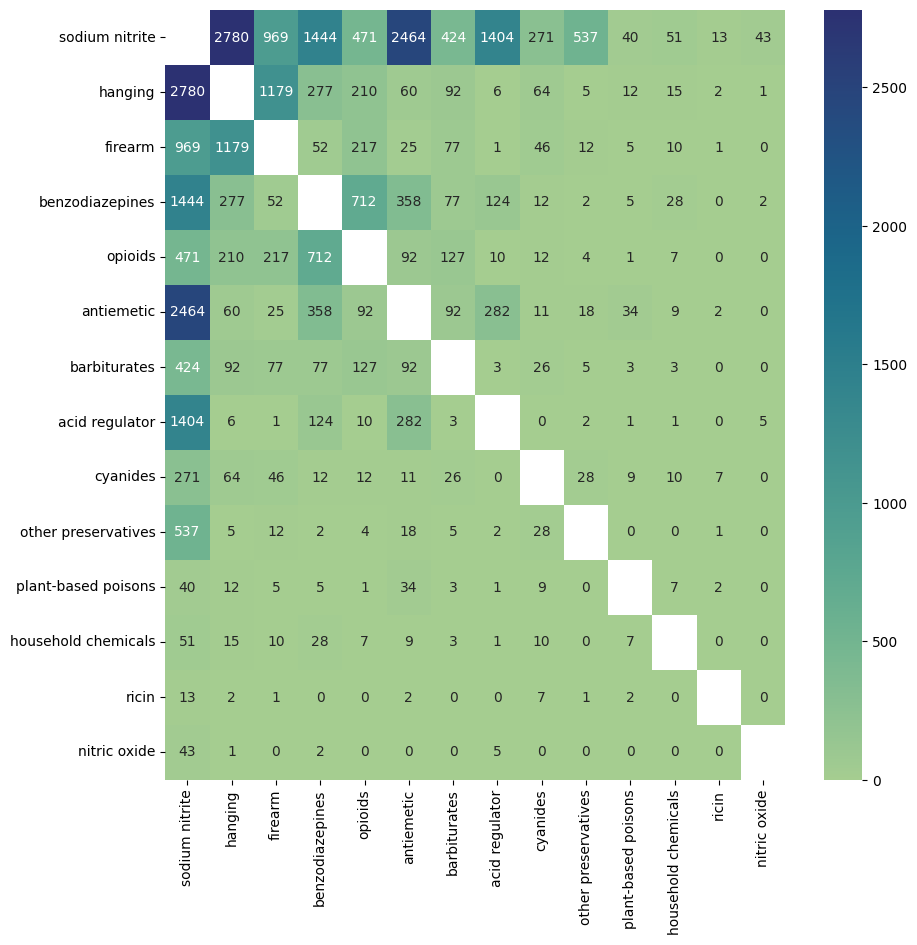

In [ ]:
# co-occurrence heatmap
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
# create mask dataframe
mask = np.full((14, 14), False)
mask = pd.DataFrame(mask, columns = groups_full, index=groups_full)
mask.values[np.fill_diagonal(mask.values, True)]

sns.heatmap(matrix, mask = mask, annot=True, fmt='d', cmap="crest")

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128759 entries, 0 to 128758
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   post_id       128759 non-null  int64 
 1   group_name    128759 non-null  object
 2   no_of_groups  128759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ MB


In [ ]:
# BERTopic on only SN dictionary group

df_temp2 = df[df['post_id'].isin(df_temp['post_id'])]
df_temp2 = df_temp
del df_temp2

In [ ]:
df_temp.head()

,post_id,group_name,no_of_groups
0,1641475,[hanging],1
1,1709493,[hanging],1
2,233329,[hanging],1
3,241976,[sn],1
4,409855,[benzodiazepines],1


In [ ]:
df_temp = df_temp.explode('group_name')
df_temp.reset_index(drop = True,inplace = True)
len(df_temp)

150961

In [ ]:
df_sn = df_temp[df_temp['group_name']=='sn']
len(df_sn)

62178

In [ ]:
df_sn.reset_index(drop = True,inplace = True)

In [ ]:
#del df_temp

In [ ]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       62178 non-null  int64 
 1   group_name    62178 non-null  object
 2   no_of_groups  62178 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
df_temp = df[df['post_id'].isin(df_sn['post_id'])]

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62178 entries, 3 to 128758
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   post_id              62178 non-null  int64 
 1   lemmatized_body      62178 non-null  object
 2   keywords_matched     62178 non-null  object
 3   group_name           62178 non-null  object
 4   monthyear            62178 non-null  object
 5   sn                   62178 non-null  int64 
 6   hanging              62178 non-null  int64 
 7   firearm              62178 non-null  int64 
 8   benzodiazepines      62178 non-null  int64 
 9   opioids              62178 non-null  int64 
 10  antiemetic           62178 non-null  int64 
 11  barbiturates         62178 non-null  int64 
 12  acid regulator       62178 non-null  int64 
 13  cyanides             62178 non-null  int64 
 14  other preservatives  62178 non-null  int64 
 15  plant-based poisons  62178 non-null  int64 
 16  hou

In [ ]:
sn_keywords = ['sn', 'sni', 'sodium nitrite', 'sodium nitrate', 'nano3','nano2', 'snit','nitrite', 'nitrate','nitrit','nitrites','snwhat']

pat = r'\b(?:{})\b'.format('|'.join(sn_keywords))

df_sn['new'] = df_temp['lemmatized_body'].str.replace(pat, '')

<ipython-input-26-39eabe1226a2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sn['new'] = df_temp['lemmatized_body'].str.replace(pat, '')


In [ ]:
len(df_sn)

62178

In [ ]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       62178 non-null  int64 
 1   group_name    62178 non-null  object
 2   no_of_groups  62178 non-null  int64 
 3   new           28997 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62178 entries, 3 to 128758
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   post_id              62178 non-null  int64 
 1   lemmatized_body      62178 non-null  object
 2   keywords_matched     62178 non-null  object
 3   group_name           62178 non-null  object
 4   monthyear            62178 non-null  object
 5   sn                   62178 non-null  int64 
 6   hanging              62178 non-null  int64 
 7   firearm              62178 non-null  int64 
 8   benzodiazepines      62178 non-null  int64 
 9   opioids              62178 non-null  int64 
 10  antiemetic           62178 non-null  int64 
 11  barbiturates         62178 non-null  int64 
 12  acid regulator       62178 non-null  int64 
 13  cyanides             62178 non-null  int64 
 14  other preservatives  62178 non-null  int64 
 15  plant-based poisons  62178 non-null  int64 
 16  hou

In [ ]:
df_sn.reset_index(drop = True,inplace = True)

In [ ]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       62178 non-null  int64 
 1   group_name    62178 non-null  object
 2   no_of_groups  62178 non-null  int64 
 3   new           28997 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [ ]:
def list_count(lis):
  return len(lis)

df_temp['no_of_groups'] = df_temp.apply(lambda x: list_count(x['group_name']),axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128759 entries, 0 to 128758
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   post_id              128759 non-null  int64 
 1   lemmatized_body      128759 non-null  object
 2   keywords_matched     128759 non-null  object
 3   group_name           128759 non-null  object
 4   monthyear            128759 non-null  object
 5   sn                   128759 non-null  int64 
 6   hanging              128759 non-null  int64 
 7   firearm              128759 non-null  int64 
 8   benzodiazepines      128759 non-null  int64 
 9   opioids              128759 non-null  int64 
 10  antiemetic           128759 non-null  int64 
 11  barbiturates         128759 non-null  int64 
 12  acid regulator       128759 non-null  int64 
 13  cyanides             128759 non-null  int64 
 14  other preservatives  128759 non-null  int64 
 15  plant-based poisons  128759 non-nu